In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [15]:
import matplotlib.pyplot as plt

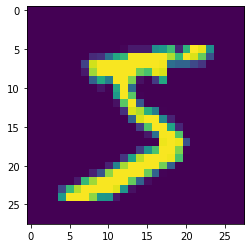

In [16]:
plt.imshow(x_train[0])

In [17]:
x_train[0].shape

(28, 28)

In [18]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
import numpy as np

In [21]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
model = Sequential([
                    # flatten will be used to convert 2D to 1D
                    # so it will make 784 neurons in input layer
                    Flatten(input_shape=(28,28)), 
                    # use Dense to insert hidden layer
                    Dense(256, activation='sigmoid'),
                    Dense(10, activation='softmax'),
])

In [23]:
model

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 7s 3ms/step - loss: 1.3661 - accuracy: 0.7162 - val_loss: 0.7890 - val_accuracy: 0.8402
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6472 - accuracy: 0.8554 - val_loss: 0.5229 - val_accuracy: 0.8741
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4936 - accuracy: 0.8746 - val_loss: 0.4348 - val_accuracy: 0.8901
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4301 - accuracy: 0.8859 - val_loss: 0.3919 - val_accuracy: 0.8945
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3948 - accuracy: 0.8923 - val_loss: 0.3640 - val_accuracy: 0.8999


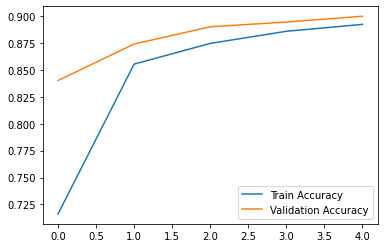

In [33]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

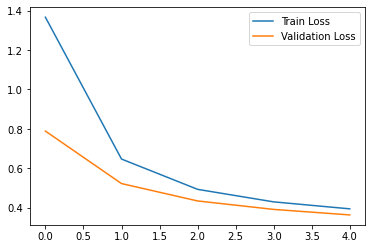

In [31]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [34]:
import cv2

In [55]:
test_img = cv2.imread('sample_image.webp')

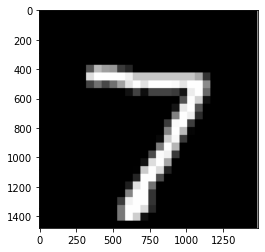

In [56]:
plt.imshow(test_img)

In [57]:
test_img.shape

(1480, 1490, 3)

In [58]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [59]:
test_img.shape

(1480, 1490)

In [60]:
test_img = cv2.resize(test_img, (28,28))

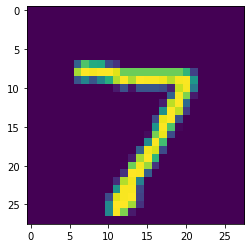

In [61]:
plt.imshow(test_img)

In [63]:
test_img = np.reshape(test_img, (1, 28, 28))
model.predict(test_img)

array([[6.7211630e-08, 1.8980966e-11, 7.0781141e-08, 4.1666835e-06,
        7.5591959e-09, 1.4064018e-09, 2.1979450e-11, 9.9996889e-01,
        1.5053857e-08, 2.6864454e-05]], dtype=float32)

In [64]:
np.argmax(model.predict(test_img)[0])

7

In [67]:
for arr in model.predict(x_test[:10]):
  print(np.argmax(arr))

7
2
1
0
4
1
4
9
6
9
